In [15]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [16]:
identified_feaures_df = pd.read_pickle('/data/experiments/YHE/sequence-library/percolator-id-feature-mapping.pkl')

In [17]:
identified_feaures_df.columns

Index(['file_idx', 'scan', 'charge_x', 'spectrum precursor m/z',
       'spectrum neutral mass', 'peptide mass', 'percolator score',
       'percolator q-value', 'percolator PEP', 'total matches/spectrum',
       'sequence', 'protein id', 'flanking aa', 'feature_id', 'charge_y',
       'rt_apex', 'rt_peak_width', 'scan_apex', 'scan_peak_width', 'intensity',
       'precursor_id', 'monoisotopic_mass', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'percolator_idx', 'human'],
      dtype='object')

In [18]:
identified_feaures_df.file_idx.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [19]:
len(identified_feaures_df[identified_feaures_df['peptide mass'] <= 0])

3498

In [20]:
# remove the rubbish peptide masses
identified_feaures_df = identified_feaures_df[identified_feaures_df['peptide mass'] > 0]

In [21]:
len(identified_feaures_df)

564292

In [22]:
identified_features_from_runs_l = []
for group_name,group_df in identified_feaures_df.groupby(['sequence','charge_x'], as_index=False):
    file_ids_l = group_df[['file_idx','percolator q-value']].to_dict('records')
    identified_features_from_runs_l.append((group_name[0], group_name[1], file_ids_l))

In [23]:
identified_features_from_runs_df = pd.DataFrame(identified_features_from_runs_l, columns=['sequence','charge','file_ids_identified'])

In [24]:
identified_features_from_runs_df.sample(n=10)

,sequence,charge,file_ids_identified
23616,RPIYEDK,2,"[{'file_idx': 10, 'percolator q-value': 0.0008..."
3391,DDNLVVLHDHYLDR,3,"[{'file_idx': 23, 'percolator q-value': 3.7296..."
16865,LLVVDPETDEQLQK,2,"[{'file_idx': 6, 'percolator q-value': 3.72963..."
29561,VLYLLSQLQQSQMAEK,2,"[{'file_idx': 17, 'percolator q-value': 3.7296..."
3323,DDDDVIAPLPNADGDIPAISDGVFPK,3,"[{'file_idx': 20, 'percolator q-value': 3.7296..."
2175,ATENDIYNFFSPLNPMR,2,"[{'file_idx': 10, 'percolator q-value': 3.7296..."
2135,ASVSPMDEPVPDSESPIEK,2,"[{'file_idx': 4, 'percolator q-value': 3.72963..."
26265,TDGTVEIYNLSANYFQEK,2,"[{'file_idx': 29, 'percolator q-value': 0.0042..."
11508,HEADELSGDASVEDDAFIK,2,"[{'file_idx': 23, 'percolator q-value': 3.7296..."
20952,NVGVRPGDAIQVQPLVGAVLQAEEMDVALSDK,3,"[{'file_idx': 22, 'percolator q-value': 3.7296..."


In [25]:
identified_features_from_runs_df.loc[28616].file_ids_identified

[{'file_idx': 29, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 16, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 21, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 23, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 0, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 27, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 23, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 0, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 21, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 15, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 25, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 22, 'percolator q-value': 8.6396074e-06},
 {'file_idx': 18, 'percolator q-value': 8.6396074e-06},
 {'file_idx': 10, 'percolator q-value': 8.6396074e-06},
 {'file_idx': 25, 'percolator q-value': 2.5195073e-05},
 {'file_idx': 16, 'percolator q-value': 2.7506601999999997e-05}

In [26]:
files_l = []
for row in identified_features_from_runs_df.itertuples():
    files_a = np.zeros(31)+10  # initialise with very high q_value
    for f in row.file_ids_identified:
        files_a[f['file_idx']] = f['percolator q-value']
    files_l.append(files_a)

In [27]:
columns = []
for file_idx in range(0,31):
    columns.append('file_{}'.format(file_idx))
files_df = pd.DataFrame(files_l, columns=columns)


In [28]:
files_df.sample(n=5)

,file_0,file_1,file_2,file_3,file_4,file_5,file_6,file_7,file_8,file_9,...,file_21,file_22,file_23,file_24,file_25,file_26,file_27,file_28,file_29,file_30
22747,10.000000,10.000000,0.009350,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,...,10.000000,10.000000,10.000000,10.000000,0.000982,10.000000,10.0,10.000000,10.000000,10.000000
17212,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,0.002583,10.0,10.000000,10.000000,10.000000
6174,0.000021,0.000007,0.000009,0.005207,0.000481,0.000009,0.000004,0.000023,0.000489,10.0,...,0.000034,0.000705,0.000565,0.000103,10.000000,0.000014,10.0,0.001128,0.001745,10.000000
29575,10.000000,0.000207,10.000000,10.000000,0.000112,10.000000,10.000000,10.000000,0.000034,10.0,...,10.000000,0.000014,0.000497,0.000021,10.000000,10.000000,10.0,10.000000,10.000000,0.000014
11410,10.000000,10.000000,10.000000,10.000000,0.002877,10.000000,10.000000,10.000000,10.000000,10.0,...,0.005536,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000


In [29]:
identifications_with_files_df = pd.concat([identified_features_from_runs_df, files_df], axis=1)

In [30]:
identifications_with_files_df.columns

Index(['sequence', 'charge', 'file_ids_identified', 'file_0', 'file_1',
       'file_2', 'file_3', 'file_4', 'file_5', 'file_6', 'file_7', 'file_8',
       'file_9', 'file_10', 'file_11', 'file_12', 'file_13', 'file_14',
       'file_15', 'file_16', 'file_17', 'file_18', 'file_19', 'file_20',
       'file_21', 'file_22', 'file_23', 'file_24', 'file_25', 'file_26',
       'file_27', 'file_28', 'file_29', 'file_30'],
      dtype='object')

In [31]:
identifications_with_files_df.sample(n=10)

,sequence,charge,file_ids_identified,file_0,file_1,file_2,file_3,file_4,file_5,file_6,...,file_21,file_22,file_23,file_24,file_25,file_26,file_27,file_28,file_29,file_30
26768,TGYGVEELISALQR,2,"[{'file_idx': 2, 'percolator q-value': 3.72963...",10.000000,0.000043,0.000004,0.000009,0.000004,0.000009,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
30477,VVSNLPAITMEEVAPVSVSDAALLAPEEIKEK,3,"[{'file_idx': 27, 'percolator q-value': 3.7296...",0.006623,10.000000,10.000000,10.000000,0.000190,10.000000,10.000000,...,0.000426,0.000522,0.000640,0.000021,0.000030,0.000087,0.008977,0.000474,0.000107,0.000183
31292,YGEAGEGPGWGGAHPR,3,"[{'file_idx': 20, 'percolator q-value': 2.5195...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
8959,FQEHIIQAPKPVEAIK,3,"[{'file_idx': 16, 'percolator q-value': 3.7296...",0.000004,10.000000,0.000388,0.000009,10.000000,10.000000,10.000000,...,0.000004,0.000004,10.000000,0.000774,0.000004,0.000004,0.001803,0.000004,0.000004,0.000004
14502,KAPAGGAADAAAK,2,"[{'file_idx': 29, 'percolator q-value': 7.2544...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,0.000725,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000073,10.000000
30872,WQNTISNVVK,2,"[{'file_idx': 27, 'percolator q-value': 0.0038...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.003899,10.000000,10.000000,10.000000
30080,VSLEEIYSGCTK,2,"[{'file_idx': 3, 'percolator q-value': 0.00047...",10.000000,10.000000,10.000000,0.000475,10.000000,10.000000,0.006322,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.001396,10.000000
20269,NLPDMIEELDLHED,2,"[{'file_idx': 25, 'percolator q-value': 3.7296...",0.000009,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,0.000430,10.000000,0.000009,0.000009,0.000004,0.000023,0.000004,0.000009,0.000009,0.000009
6021,EEPVSEEGEEDEEQEAEEEPMDTSPSGLHSK,3,"[{'file_idx': 17, 'percolator q-value': 1.3932...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000489,...,0.000498,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.004285,10.000000
27464,TPQGAVPAYLLDR,2,"[{'file_idx': 6, 'percolator q-value': 3.72963...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000004,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [32]:
file_idx_run_name_mapping_df = pd.read_csv('/data/experiments/YHE/recalibrated-percolator-output/percolator-idx-mapping.csv')

In [53]:
file_idx_run_name_mapping_df['group'] = file_idx_run_name_mapping_df.run_name.apply(lambda x: x.split('_')[0])
file_idx_run_name_mapping_df['abbrev_run_name'] = file_idx_run_name_mapping_df.run_name.apply(lambda x: x.split('_Slot')[0])

In [54]:
file_idx_run_name_mapping_df.sort_values(by=['run_name'], ascending=True, inplace=True)

In [55]:
file_idx_run_name_mapping_df

,file_idx,run_name,group,abbrev_run_name
2,2,YHE010_02_Slot1-1_1_2987,YHE010,YHE010_02
3,3,YHE010_03_Slot1-1_1_2988,YHE010,YHE010_03
19,19,YHE010_04_Slot1-1_1_2989,YHE010,YHE010_04
1,1,YHE010_05_Slot1-1_1_2990,YHE010,YHE010_05
12,12,YHE010_06_Slot1-1_1_2991,YHE010,YHE010_06
5,5,YHE010_07_Slot1-1_1_2992,YHE010,YHE010_07
17,17,YHE010_08_Slot1-1_1_2993,YHE010,YHE010_08
4,4,YHE010_09_Slot1-1_1_2994,YHE010,YHE010_09
7,7,YHE010_10_Slot1-1_1_2995,YHE010,YHE010_10
6,6,YHE010_11_Slot1-1_1_3041,YHE010,YHE010_11


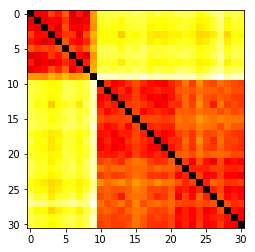

In [45]:
import matplotlib.pyplot as plt
import numpy as np

a = np.zeros((31,31), dtype='float')
for i,row_i in enumerate(file_idx_run_name_mapping_df.itertuples()):
    for j,row_j in enumerate(file_idx_run_name_mapping_df.itertuples()):
        a[i,j] = abs(identifications_with_files_df['file_{}'.format(row_i.file_idx)] - identifications_with_files_df['file_{}'.format(row_j.file_idx)]).sum()

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()


In [47]:
import seaborn as sns

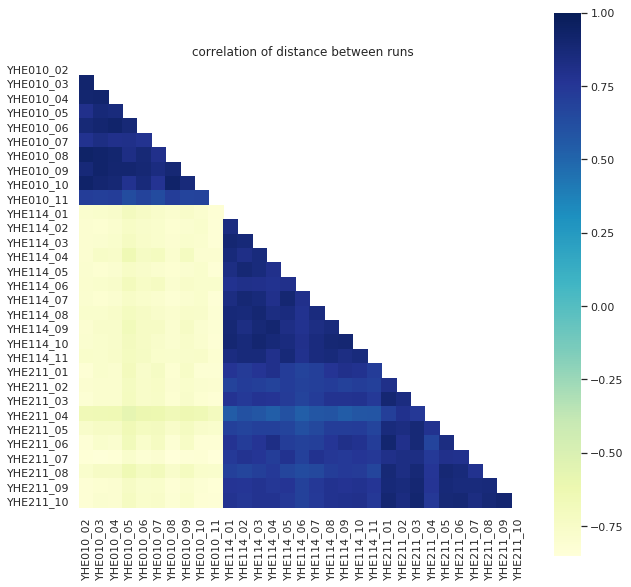

In [64]:
corr = np.corrcoef(a)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(10,10)})
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,  cmap="YlGnBu", xticklabels=file_idx_run_name_mapping_df.abbrev_run_name, yticklabels=file_idx_run_name_mapping_df.abbrev_run_name)
    ax.set_title('correlation of distance between runs')
    plt.show()